In [39]:
import math
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



In [40]:
# stock_data = yf.download('TSLA', start='2016-01-01', end='2021-10-01')
# stock_data.head()
tsla = yf.Ticker('TSLA')
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. It operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; purchase financing and leasing services; services for electric vehicles through its compa

In [47]:
tsla.history(period='1y')

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-06-06 00:00:00-04:00,244.353333,244.866669,234.350006,238.279999,84204600,0.0,0.0
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500,0.0,0.0
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500,0.0,0.0
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400,0.0,0.0
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600,0.0,0.0
...,...,...,...,...,...,...,...
2023-05-30 00:00:00-04:00,200.100006,204.479996,197.529999,201.160004,128818700,0.0,0.0
2023-05-31 00:00:00-04:00,199.779999,203.949997,195.119995,203.929993,150711700,0.0,0.0
2023-06-01 00:00:00-04:00,202.589996,209.800003,199.369995,207.520004,148029900,0.0,0.0


In [48]:
data = tsla.history(period='1y')
data = data[['Open', 'High', 'Low', 'Close', 'Volume']]

In [52]:
data.head()

,Open,High,Low,Close,Volume
Date,,,,,
2022-06-06 00:00:00-04:00,244.353333,244.866669,234.350006,238.279999,84204600
2022-06-07 00:00:00-04:00,234.000000,239.996674,230.093338,238.886673,72808500
2022-06-08 00:00:00-04:00,240.086670,249.963333,239.176666,241.866669,76210500
2022-06-09 00:00:00-04:00,249.339996,255.546661,239.326660,239.706665,96491400
2022-06-10 00:00:00-04:00,235.156662,239.500000,227.913330,232.229996,97536600


In [53]:
# plt.figure(figsize=(15, 8))
# plt.title('Stock Prices History')
# plt.plot(data['Close'])
# plt.xlabel('Date')
# plt.ylabel('Prices ($)')

In [118]:
closing_price_data = data['Close'].values
print(closing_price_data)

training_data_size = math.ceil(len(closing_price_data) * 0.8)
print(training_data_size)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_price_data.reshape(-1, 1))

test_data = scaled_data[training_data_size-60:]
x_test = []

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

y_test = closing_price_data[training_data_size:]
print(len(test_data))
print(len(x_test))

[238.27999878 238.88667297 241.8666687  239.70666504 232.22999573
 215.73666382 220.88999939 233.         213.1000061  216.75999451
 237.03666687 236.08666992 235.07000732 245.70666504 244.91999817
 232.66333008 228.49000549 224.47332764 227.26333618 233.06666565
 231.7333374  244.54333496 250.76333618 234.34333801 233.07000732
 237.03999329 238.31333923 240.06666565 240.54666138 245.52999878
 247.5        271.70666504 272.24334717 268.43331909 258.85998535
 274.82000732 280.8999939  297.1499939  297.27667236 300.58666992
 307.39666748 308.6333313  288.17001343 290.42333984 283.33334351
 294.35665894 286.63000488 300.02999878 309.32000732 306.56332397
 303.99667358 302.86999512 296.66665649 289.91333008 296.45333862
 297.09667969 296.07000732 288.08999634 284.82000732 277.70001221
 275.60998535 277.16000366 270.20999146 274.42001343 283.70001221
 289.26000977 299.67999268 304.42001343 292.13000488 302.60998535
 303.75       303.3500061  309.07000732 308.73001099 300.79998779
 288.58999

In [119]:
model = keras.Sequential()
model.add(layers.LSTM(100, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(layers.LSTM(100, return_sequences=False))
model.add(layers.Dense(25))
model.add(layers.Dense(1))
model.summary()

2023-06-05 16:59:45.648621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 16:59:45.649972: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 16:59:45.652270: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 60, 100)           40800     
                                                                 
 lstm_17 (LSTM)              (None, 100)               80400     
                                                                 
 dense_16 (Dense)            (None, 25)                2525      
                                                                 
 dense_17 (Dense)            (None, 1)                 26        
                                                                 
Total params: 123,751
Trainable params: 123,751
Non-trainable params: 0
_________________________________________________________________


In [120]:
model.compile(optimizer='sgd', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=3)

Epoch 1/3


2023-06-05 16:59:48.336597: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 16:59:48.337908: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 16:59:48.339582: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

141/141 [==============================] - 4s 16ms/step - loss: 0.0314
Epoch 2/3
141/141 [==============================] - 2s 15ms/step - loss: 0.0157
Epoch 3/3
141/141 [==============================] - 2s 15ms/step - loss: 0.0139


In [121]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

2023-06-05 16:59:59.088099: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-05 16:59:59.089190: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-05 16:59:59.090963: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 1s 19ms/step


4.04890625

/var/folders/bb/rf48tj5n0g75x7v63p4n_h_h0000gn/T/ipykernel_18202/3861996149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


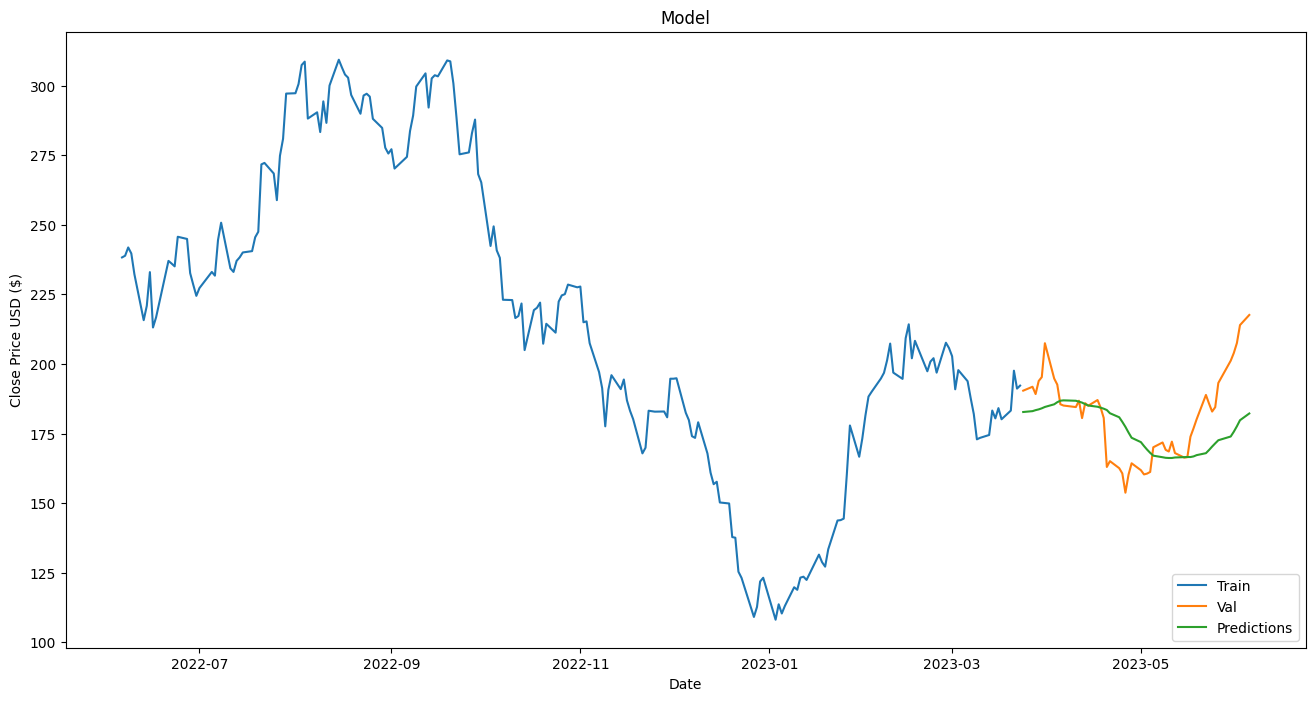

In [122]:
data_b = data.filter(['Close'])
train = data_b[:training_data_len]
validation = data_b[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

/var/folders/bb/rf48tj5n0g75x7v63p4n_h_h0000gn/T/ipykernel_18202/1650845611.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  validation['Predictions'] = predictions


50
                                Close  Predictions
Date                                              
2023-05-31 00:00:00-04:00  203.929993   175.649490
2023-06-01 00:00:00-04:00  207.520004   177.616974
2023-06-02 00:00:00-04:00  213.970001   179.783432
2023-06-05 00:00:00-04:00  217.610001   182.207489


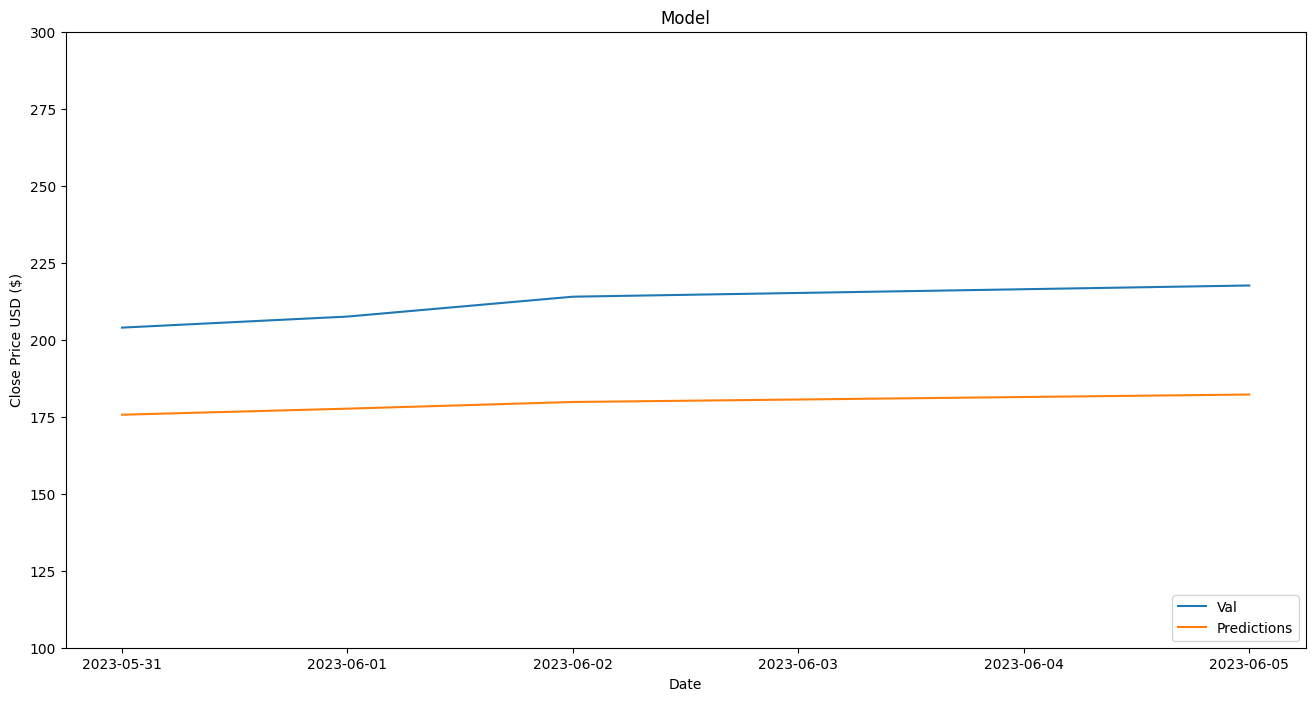

In [123]:
data_b = data.filter(['Close'])
train = data_b[:training_data_len]
validation = data_b[training_data_len:]
validation['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
# plt.plot(validation[['Close', 'Predictions']])

print(validation.shape[0])
print(validation.iloc[46:][0:])
plt.ylim(100, 300)
plt.plot(validation.iloc[46:][0:])

plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()